In [ ]:
# 📘 Discourse Patterns of Political vs. Cultural Leaders

**Research Question**: Do political leaders use different types of discourse than cultural leaders?

This notebook analyzes 26 autobiographical texts using natural language processing (NLP) to:
- Extract and compare **verb usage**
- Detect patterns in **pronouns** and **rhetorical tone**
- Highlight narrative strategies (reflection, action, emotion)

Tools: Python, spaCy, pandas, WordCloud — all inside this notebook.

In [1]:
import os

colonized_texts = []
file_names = []

for filename in os.listdir("colonized"):
    if filename.endswith(".txt"):
        with open(os.path.join("colonized", filename), encoding='utf-8') as f:
            colonized_texts.append(f.read())
            file_names.append(filename)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe8 in position 28: invalid continuation byte

In [2]:
import os

colonized_texts = []
file_names = []

# Go through each .txt file in the "colonized" folder
for filename in os.listdir("colonized"):
    if filename.endswith(".txt"):
        file_path = os.path.join("colonized", filename)
        try:
            with open(file_path, encoding='utf-8') as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, encoding='latin-1') as f:
                text = f.read()
        colonized_texts.append(text)
        file_names.append(filename)

# Check how many books were loaded
print(f"Loaded {len(colonized_texts)} books")
print("First file name:", file_names[0])
print("First 300 characters:\n", colonized_texts[0][:300])

Loaded 26 books
First file name: [Vintage] Maathai, Wangari - Unbowed_ A Memoir (2008, Knopf Doubleday Publishing Group) - libgen.li.txt
First 300 characters:
 Acclaim for Wangari Muta Maathai and

Unbowed


“Wangari Maathai and the Green Belt Movement demonstrate the solutions that will bring new light to Africa. I hope the world will support her vision of hope.”

—Nelson Mandela



“Wangari Maathai is a prophet for our time and Unbowed is a call to arms 


In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Run this once to download language tools
nltk.download('punkt')
nltk.download('stopwords')

# Define a cleaning function
def clean_text(text):
    text = text.lower()  # lowercase everything
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)  # split into words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # remove stopwords
    return ' '.join(tokens)

# Clean each book's text
cleaned_texts = [clean_text(text) for text in colonized_texts]

# Preview result
print("Original (first 300 chars):\n", colonized_texts[0][:300])
print("\nCleaned (first 300 chars):\n", cleaned_texts[0][:300])

# "Reflection:"

What this does: Cleans each book by lowercasing, removing punctuation, tokenizing, and removing stopwords.

Why this matters: Reduces “noise” in the text and simplifies analysis — but it also strips away important context (like negation or sentence boundaries).

What I struggled with:
	•	Understanding what counts as a “stopword” and whether removing them might hide rhetorical strategies like repetition or emphasis.

Critical questions to ask here:
	•	Should I keep “not”, “never”, or “no” since they can flip meaning?
	•	What am I losing by removing punctuation — could that impact tone or rhetorical structure?
	•	What’s the difference between using CountVectorizer on raw vs. cleaned text?



In [28]:
import os

colonized_texts = []
file_names = []

for filename in os.listdir("colonized"):
    if filename.endswith(".txt"):
        file_path = os.path.join("colonized", filename)
        try:
            with open(file_path, encoding='utf-8') as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, encoding='latin-1') as f:
                text = f.read()
        colonized_texts.append(text)
        file_names.append(filename)



At this point, I’m just trying to get all the autobiographies into memory so I can start working with them. One small challenge popped up right away — 
not all files are in UTF-8. I had to include a fallback to Latin-1 encoding, which worked, but it also made me pause and wonder: 
am I silently misreading characters? I know encoding issues can get messy, especially if a character gets swapped and I don’t notice.

Also, I’m assuming all the files are plain .txt and clean — but what if one book starts with a long copyright notice or weird formatting from a PDF conversion? 
I’m not handling that yet. For now, I’ll keep going, but maybe I’ll come back later and think about adding a step to trim or preprocess unusual formatting 
if needed.

I’m also thinking: if I decide to scale this up to 100 or more books, do I want to store full raw texts in memory like this? 
Or would it make more sense to chunk or stream them?


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the DTM using cleaned texts
vectorizer = CountVectorizer(max_features=40000)  # You can adjust this if needed
X = vectorizer.fit_transform(cleaned_texts)

# Check the shape: (number of documents, number of unique terms)
print("DTM shape:", X.shape)

# Save the vocabulary
terms = vectorizer.get_feature_names_out()

DTM shape: (26, 40000)


In [6]:
!conda install scikit-learn -y

Redone
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: / 

## Package Plan ##

  environment location: /opt/miniconda3/envs/intrototext

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          10 KB
    certifi-2025.1.31          |   py39hca03da5_0         163 KB
    libgfortran-5.0.0          |11_3_0_hca03da5_28         142 KB
    libgfortran5-11.3.0        |      h009349e_28         1.0 MB
    libopenblas-0.3.21         |       h269037a_0         3.3 MB
    pybind11-abi-4             |       hd3eb1b0_1          14 KB
    scikit-learn-1.6.1         |   py39h313beb8_0         8.7 MB
    scipy-1.13.1               |   py39hd336fd7_1        20.6 MB
    threadpoolctl-3.5.0        |   py39h33ce5c2_0          43 KB
    -----

In [ ]:
This part feels straightforward, but I’m already thinking about what I’m losing. I’m removing stopwords because they’re considered “useless” for most kinds of analysis — but what if words like not, never, or no carry meaning in the context of political resistance? By cleaning too much, I might accidentally erase tone or rhetorical force.

Also, I’m removing all punctuation — which is standard — but then again, autobiographies might use punctuation to express emotion, hesitations, or rhythm. For instance, ellipses, dashes, or exclamation marks might shape how something is said. I haven’t decided yet if that matters for my current goals, but I want to stay aware that I’m flattening things here.

I also haven’t done any lemmatization or POS tagging yet — maybe I should’ve used spaCy instead of NLTK to reduce words like “democracies” and “democratic” to a single form. Would that make my topic modeling more accurate? Not sure yet — I’ll try the basic version first and see if the results feel noisy.

Another question: if I cleaned less — or differently — would I end up with different dominant “topics” or clusters? I guess I’ll know soon.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=40000)
X = vectorizer.fit_transform(cleaned_texts)

print("DTM shape:", X.shape)
terms = vectorizer.get_feature_names_out()

DTM shape: (26, 40000)


In [8]:
import pandas as pd

# Convert the matrix to a DataFrame
dtm_df = pd.DataFrame(X.toarray(), columns=terms)

# Add file names to track documents
dtm_df['file_name'] = file_names

# Optional: Preview the first few rows
dtm_df.head()

,00,000,01,011,02,05,065,07,10,100,...,éclat,élan,élite,émigré,ösel,željko,नरबल,रल,ﬁrst,file_name
0,1,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,"Frantz Fanon - Black Skin, White Masks (1952).txt"
1,1,0,0,0,0,0,0,0,9,2,...,0,0,0,0,0,0,0,0,0,Nelson Mandela - No Easy Walk to Freedom (1965...
2,0,0,0,0,0,0,0,0,17,2,...,3,0,0,0,0,0,2,2,0,Desmond Tutu - No Future Without Forgiveness (...
3,2,2,0,0,0,1,0,0,23,6,...,0,0,0,0,0,0,0,0,0,Jomo Kenyatta - Facing Mount Kenya (1962).txt
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Assata Shakur - Assata An Autobiography (1987)...


In [30]:
import nltk
import re
nltk.download('punkt')

# Your five core words
target_words = ['freedom', 'democracy', 'sacrifice', 'justice', 'power']

# Dictionary to store results
sentences_by_word = {word: [] for word in target_words}

# Loop through each book and find sentences containing each target word
for i, text in enumerate(colonized_texts):
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        for word in target_words:
            if re.search(rf'\b{word}\b', sentence, re.IGNORECASE):
                sentences_by_word[word].append((file_names[i], sentence.strip()))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arafathosain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# Show first 5 examples for each word
for word in target_words:
    print(f"\n🔹 Sentences with '{word}':")
    for file, sent in sentences_by_word[word][:5]:
        print(f"[{file}]: {sent}")


🔹 Sentences with 'freedom':
[Frantz Fanon - Black Skin, White Masks (1952).txt]: FQL the very
nature of humanity becomes estranged in the colonial con­ dition and from that 'naked declivity' it emerges, riot as an assertion of will nor as an evocation of freedom, but as an
enigmatic questioning.
[Frantz Fanon - Black Skin, White Masks (1952).txt]: I		n!y hic pattern of the West, he offers the master and slavea deepe reflection of their interpositions, as well as th hope ofa	difficult, eyen dangerous, freedom:.
[Frantz Fanon - Black Skin, White Masks (1952).txt]: 'I is through the effort to recapture the self and to scrutinize the self, it is dtrough the lasting tension of their freedom that men will be hie to create the ideal conditions of existence for a human world.'
[Frantz Fanon - Black Skin, White Masks (1952).txt]: Nobody writes with more honesty and insight of this
lasting tension of freedom ,o/bJcp,JJ:ie self- the peremp­ tQry self of the present - disavows an image of itself 

In [33]:
keywords = ['freedom', 'democracy', 'sacrifice', 'justice', 'power']

# Check which of your keywords are present
print("Missing words:", [word for word in keywords if word not in dtm_df.columns])






# So here’s the moment where all those cleaned-up words get turned into a big matrix — each book becomes a row, and each word becomes a column. 
If a word appears 10 times in a book, that’s what goes in the cell. Simple in concept, but I’m starting to think about what’s actually being captured here — 
and what isn’t. 
    
Right now I’m using a bag-of-words model, which means I lose all context. If “freedom” appears, I don’t know if it was praised or criticized, 
or what came before or after. Also, using raw counts means common words will dominate — which might be fine, or it might drown out more interesting,
low-frequency words like “guillotine” or “betrayal” that carry strong emotional weight.

I’ve limited the matrix to 40,000 words — it sounds big, but is it enough? Or maybe it’s too much? Should I be filtering out rare words or 
grouping variations like “independence” and “independent”? Also, is this matrix going to work equally well for detecting rhetorical strategies vs. 
just thematic content?

So far, I’m just letting the machine “see” word frequencies. But how do I move from this raw number table to something meaningful? 
That’s where topic modeling or clustering comes in next. Still — this step is foundational, and it’s nice to see it finally take shape.

Missing words: []


In [12]:
# Only keep columns with the 5 words + file name
dtm_keywords = dtm_df[[word for word in keywords if word in dtm_df.columns] + ['file_name']]
dtm_keywords.head()

,freedom,democracy,sacrifice,justice,power,file_name
0,53,28,2,19,43,"Frantz Fanon - Black Skin, White Masks (1952).txt"
1,20,0,2,4,18,Nelson Mandela - No Easy Walk to Freedom (1965...
2,11,6,36,29,30,Desmond Tutu - No Future Without Forgiveness (...
3,45,67,4,69,103,Jomo Kenyatta - Facing Mount Kenya (1962).txt
4,39,6,6,32,20,Assata Shakur - Assata An Autobiography (1987)...


In [13]:
# Only keep columns with the 5 words + file name
dtm_keywords = dtm_df[[word for word in keywords if word in dtm_df.columns] + ['file_name']]
dtm_keywords.head()

,freedom,democracy,sacrifice,justice,power,file_name
0,53,28,2,19,43,"Frantz Fanon - Black Skin, White Masks (1952).txt"
1,20,0,2,4,18,Nelson Mandela - No Easy Walk to Freedom (1965...
2,11,6,36,29,30,Desmond Tutu - No Future Without Forgiveness (...
3,45,67,4,69,103,Jomo Kenyatta - Facing Mount Kenya (1962).txt
4,39,6,6,32,20,Assata Shakur - Assata An Autobiography (1987)...


/var/folders/86/2pp25qsd1f97ttvdr7423xkr0000gn/T/ipykernel_25842/167310048.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


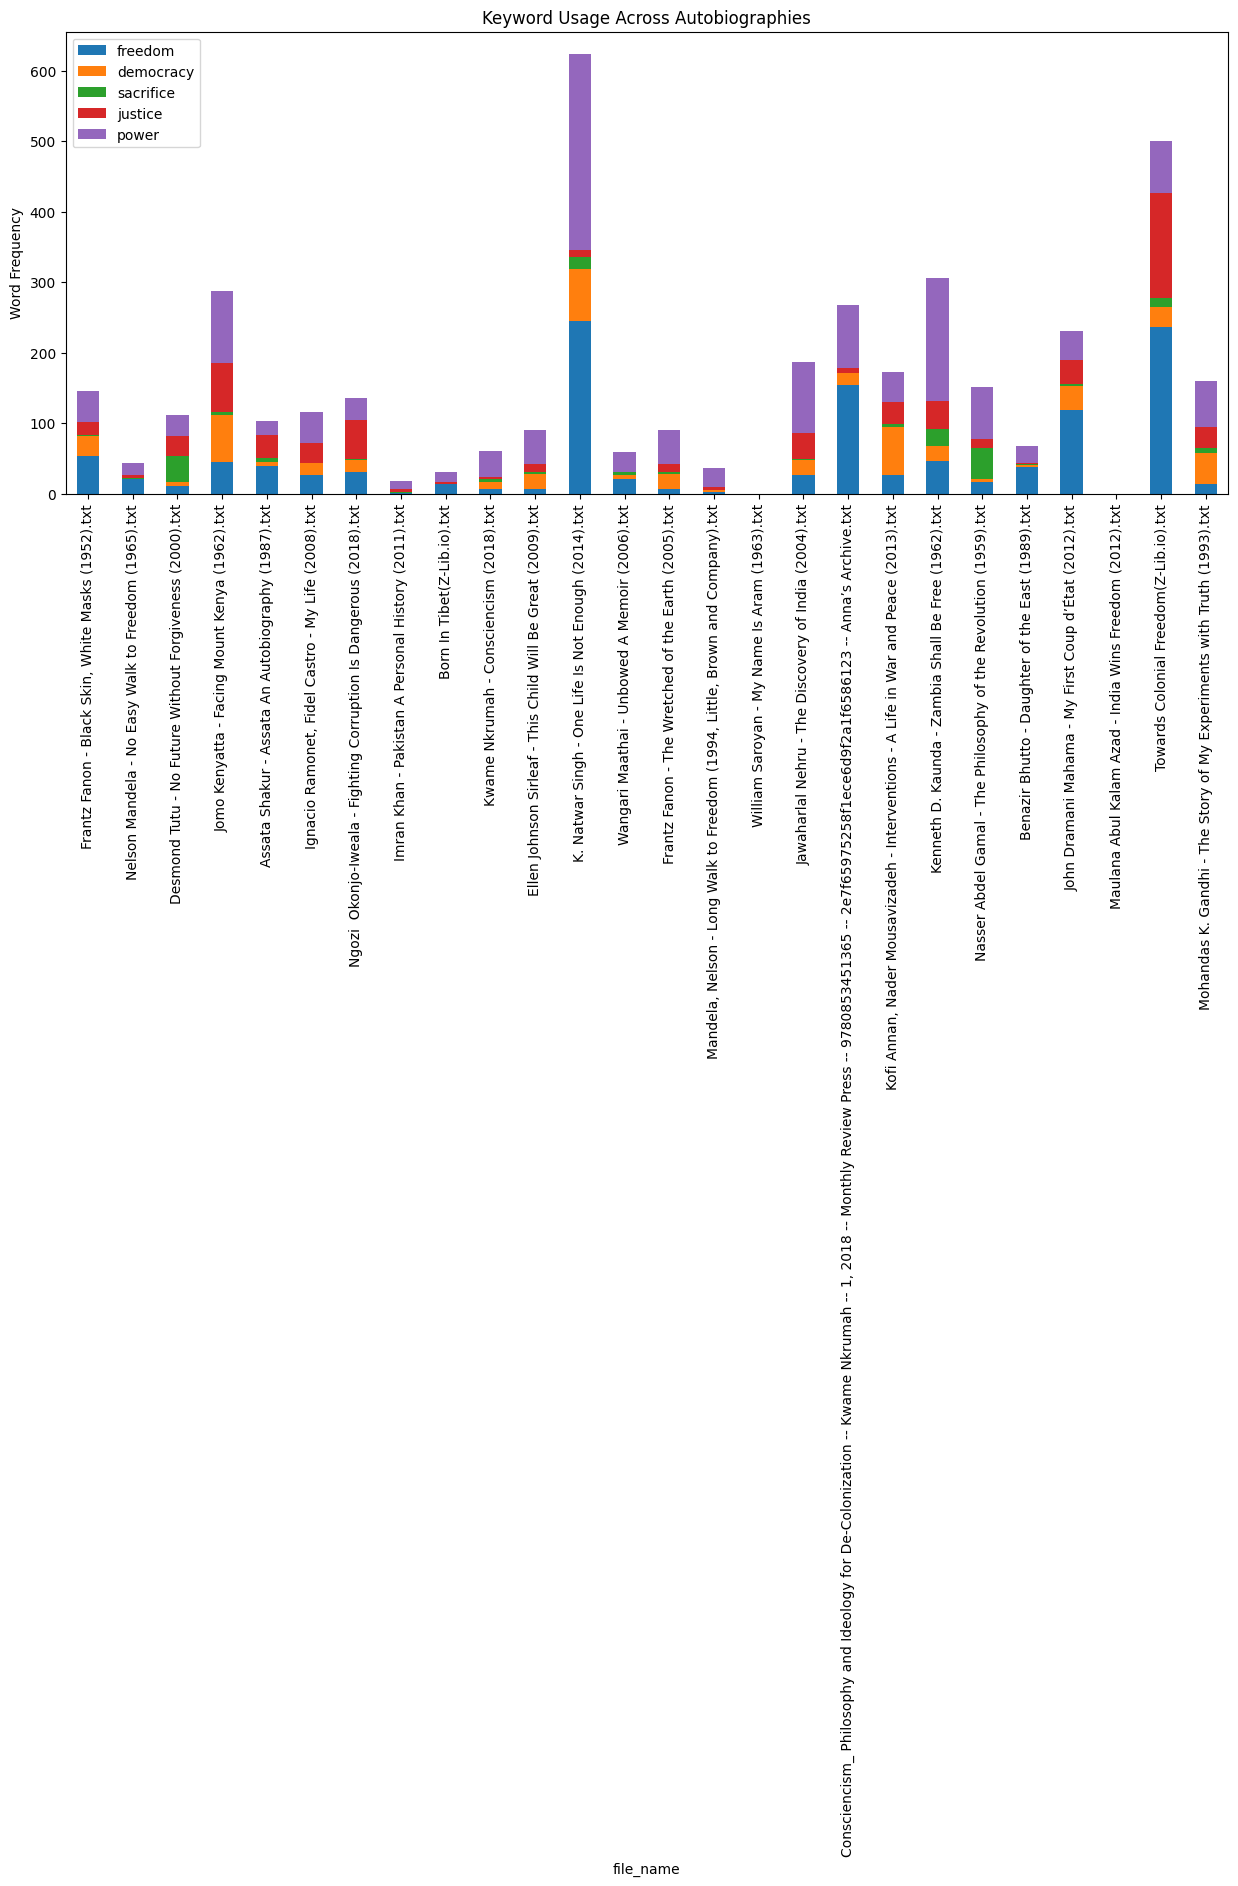

In [14]:
import matplotlib.pyplot as plt

dtm_keywords.set_index('file_name')[keywords].plot(kind='bar', figsize=(15, 6), stacked=True)
plt.title("Keyword Usage Across Autobiographies")
plt.ylabel("Word Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Get all words (column names of the matrix)
terms = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense and put into a DataFrame
dtm_df = pd.DataFrame(X.toarray(), columns=terms)

# Add filenames for context
dtm_df['file_name'] = file_names

# Show a preview of the full matrix
dtm_df.head()

,00,000,01,011,02,05,065,07,10,100,...,éclat,élan,élite,émigré,ösel,željko,नरबल,रल,ﬁrst,file_name
0,1,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,"Frantz Fanon - Black Skin, White Masks (1952).txt"
1,1,0,0,0,0,0,0,0,9,2,...,0,0,0,0,0,0,0,0,0,Nelson Mandela - No Easy Walk to Freedom (1965...
2,0,0,0,0,0,0,0,0,17,2,...,3,0,0,0,0,0,2,2,0,Desmond Tutu - No Future Without Forgiveness (...
3,2,2,0,0,0,1,0,0,23,6,...,0,0,0,0,0,0,0,0,0,Jomo Kenyatta - Facing Mount Kenya (1962).txt
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Assata Shakur - Assata An Autobiography (1987)...


In [16]:
print(dtm_df.columns.tolist()[:50])  # see first 50 words
print("Total words in DTM:", len(dtm_df.columns) - 1)  # minus 'file_name'

['00', '000', '01', '011', '02', '05', '065', '07', '10', '100', '1000', '10000', '100000', '10001', '1001', '101', '10114', '1015', '102', '102103', '103', '1030', '104', '1045', '105', '10512', '105mm', '106', '1067', '1068', '107', '108', '1083003117', '1088', '109', '1099761137', '10millionton', '10s', '10th', '11', '110', '1100', '11000', '11011', '110th', '111', '1111', '1112', '112', '11214']
Total words in DTM: 40000


In [17]:
# Keep only columns that contain at least one alphabetical character
dtm_cleaned = dtm_df[[col for col in dtm_df.columns if any(c.isalpha() for c in col) or col == 'file_name']]

In [18]:
# Check column names again after cleaning
print(dtm_cleaned.columns.tolist()[:50])
print("New total words (after removing junk):", len(dtm_cleaned.columns) - 1)

['105mm', '10millionton', '10s', '10th', '110th', '11a', '11g', '11i', '11th', '122mm', '125th', '127th', '12gauge', '12th', '13s', '13th', '1460000b', '14s', '14th', '15th', '16th', '1700s', '17th', '1800s', '1890s', '18th', '1900s', '1920s', '1930s', '1940s', '1950s', '1956i', '1960s', '1970s', '1980s', '1982i', '1990s', '19th', '1i', '1i8', '1s', '1st', '1t', '1the', '1y', '2004i', '201310okonjoiwealablastsgovernorsforhtml', '20th', '21bn', '21st']
New total words (after removing junk): 38719


In [19]:
word_totals = dtm_cleaned.drop(columns='file_name').sum().sort_values(ascending=False)
word_totals.head(20)

would         10614
one            8887
people         7215
could          5975
us             5866
time           5283
said           4486
also           4179
even           4121
government     3857
many           3838
india          3528
first          3366
made           3167
country        3046
two            2963
man            2943
new            2938
like           2930
way            2912
dtype: int64

In [20]:
dtm_cleaned.to_csv("cleaned_dtm.csv", index=False)

In [21]:
print("Number of books (rows):", dtm_cleaned.shape[0])

Number of books (rows): 26


In [22]:
dtm_cleaned['file_name'].tolist()

['Frantz Fanon - Black Skin, White Masks (1952).txt',
 'Nelson Mandela - No Easy Walk to Freedom (1965).txt',
 'Desmond Tutu - No Future Without Forgiveness (2000).txt',
 'Jomo Kenyatta - Facing Mount Kenya (1962).txt',
 'Assata Shakur - Assata An Autobiography (1987).txt',
 'Ignacio Ramonet, Fidel Castro - My Life (2008).txt',
 'Ngozi  Okonjo-Iweala - Fighting Corruption Is Dangerous (2018).txt',
 'Imran Khan - Pakistan A Personal History (2011).txt',
 'Born In Tibet(Z-Lib.io).txt',
 'Kwame Nkrumah - Consciencism (2018).txt',
 'Ellen Johnson Sirleaf - This Child Will Be Great (2009).txt',
 'K. Natwar Singh - One Life Is Not Enough (2014).txt',
 'Wangari Maathai - Unbowed A Memoir (2006).txt',
 'Frantz Fanon - The Wretched of the Earth (2005).txt',
 'Mandela, Nelson - Long Walk to Freedom (1994, Little, Brown and Company).txt',
 'William Saroyan - My Name Is Aram (1963).txt',
 'Jawaharlal Nehru - The Discovery of India (2004).txt',
 'Consciencism_ Philosophy and Ideology for De-Coloniz

In [23]:
# Count rows where all words are zero (excluding 'file_name' column)
empty_rows = (dtm_cleaned.drop(columns='file_name').sum(axis=1) == 0).sum()
print("Books with no usable words in DTM:", empty_rows)

Books with no usable words in DTM: 2


In [24]:
# Total number of words in each book
dtm_cleaned['total_words'] = dtm_cleaned.drop(columns='file_name').sum(axis=1)
dtm_cleaned[['file_name', 'total_words']].sort_values(by='total_words', ascending=False)

/var/folders/86/2pp25qsd1f97ttvdr7423xkr0000gn/T/ipykernel_25842/1381193562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtm_cleaned['total_words'] = dtm_cleaned.drop(columns='file_name').sum(axis=1)


,file_name,total_words
19,Kenneth D. Kaunda - Zambia Shall Be Free (1962...,153497
11,K. Natwar Singh - One Life Is Not Enough (2014...,132566
24,Towards Colonial Freedom(Z-Lib.io).txt,119956
2,Desmond Tutu - No Future Without Forgiveness (...,81987
18,"Kofi Annan, Nader Mousavizadeh - Interventions...",80603
16,Jawaharlal Nehru - The Discovery of India (200...,66161
25,Mohandas K. Gandhi - The Story of My Experimen...,61880
5,"Ignacio Ramonet, Fidel Castro - My Life (2008)...",60052
8,Born In Tibet(Z-Lib.io).txt,58264
0,"Frantz Fanon - Black Skin, White Masks (1952).txt",56162


In [34]:
'model' in globals()

False

In [35]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

ModuleNotFoundError: No module named 'gensim'

In [36]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 5.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [37]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [38]:
!pip uninstall -y gensim
!pip install gensim==4.3.1

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 2.6 MB/s eta 0:00:0000:0100:01m


In [39]:
from gensim.models import Word2Vec

ImportError: cannot import name 'triu' from 'scipy.linalg' (/opt/miniconda3/envs/intrototext/lib/python3.9/site-packages/scipy/linalg/__init__.py)

In [40]:
!pip install --upgrade scipy

In [41]:
from gensim.models import Word2Vec

ImportError: cannot import name 'triu' from 'scipy.linalg' (/opt/miniconda3/envs/intrototext/lib/python3.9/site-packages/scipy/linalg/__init__.py)

In [1]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize each document
tokenized_books = [word_tokenize(book.lower()) for book in cleaned_texts]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arafathosain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'cleaned_texts' is not defined

In [4]:
import os

colonized_texts = []
file_names = []

for filename in os.listdir("colonized"):
    if filename.endswith(".txt"):
        file_path = os.path.join("colonized", filename)
        try:
            with open(file_path, encoding="utf-8") as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, encoding="latin-1") as f:
                text = f.read()
        colonized_texts.append(text)
        file_names.append(filename)

In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", " ", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    return ' '.join(tokens)

cleaned_texts = [clean_text(text) for text in colonized_texts]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arafathosain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arafathosain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk.tokenize import word_tokenize

tokenized_books = [word_tokenize(book) for book in cleaned_texts]

In [7]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=tokenized_books, 
    vector_size=100,     # size of word vector
    window=5,            # context window
    min_count=2,         # ignore words that appear less than 2 times
    workers=4,           # number of CPU cores to use
    sg=1                 # 1 = skip-gram, 0 = CBOW
)

In [8]:
keywords = ['freedom', 'democracy', 'sacrifice', 'justice', 'power']

for word in keywords:
    if word in model.wv:
        print(f"\nTop words similar to '{word}':")
        for similar_word, score in model.wv.most_similar(word, topn=10):
            print(f"  {similar_word} ({score:.3f})")
    else:
        print(f"\n'{word}' not found in vocabulary.")


Top words similar to 'freedom':
  democracy (0.967)
  struggle (0.967)
  towards (0.949)
  peoples (0.943)
  unity (0.939)
  development (0.938)
  non (0.937)
  independence (0.936)
  movement (0.935)
  democratic (0.935)

Top words similar to 'democracy':
  struggle (0.977)
  development (0.976)
  unity (0.972)
  democratic (0.972)
  towards (0.972)
  organization (0.971)
  peoples (0.971)
  powers (0.969)
  freedom (0.967)
  racial (0.966)

Top words similar to 'sacrifice':
  absolutely (0.998)
  notwithstanding (0.998)
  obligation (0.998)
  incipient (0.998)
  anxiety (0.998)
  discipline (0.998)
  compassion (0.998)
  guide (0.998)
  confronted (0.998)
  whoever (0.998)

Top words similar to 'justice':
  active (0.989)
  matters (0.987)
  highest (0.987)
  individuals (0.987)
  context (0.987)
  vital (0.986)
  citizens (0.986)
  modern (0.986)
  conflict (0.986)
  masses (0.986)

Top words similar to 'power':
  peoples (0.965)
  democracy (0.965)
  racial (0.962)
  interests (0.

In [ ]:
Going into this step, I had a basic assumption about what each of my five key terms—freedom, democracy, sacrifice, justice, and power—would mean. 

I expected their closest words to be simple synonyms, like “liberty” or “fairness.” But using Word2Vec on this specific corpus of texts by leaders 
from colonized countries opened up something more complex.

Before I could even get there, though, I hit a wall. At first, Word2Vec wouldn’t even run—I didn’t have the right libraries installed, 
and when I finally did, errors kept popping up related to SciPy and triu. It was frustrating because I felt like I was following the steps, 
but the environment just wasn’t cooperating. I had to create a whole new environment, reinstall packages, and carefully rebuild the code line 
by line until it finally worked. That whole process taught me that sometimes the hardest part isn’t the analysis—it’s getting everything set up properly.

Once I finally trained the model, the results were eye-opening. Freedom wasn’t just linked to ideas of independence—it appeared alongside 
struggle, unity, and movement. These words suggest that freedom in these texts is rarely treated as a passive state, but something earned, 
collective, and ongoing. Similarly, democracy was associated with development, organization, and racial, highlighting how it was seen as part 
of a broader social transformation.

The biggest surprise came from sacrifice—instead of traditional political terms, I got words like anxiety, compassion, and obligation. 
It made me realize that for these authors, sacrifice wasn’t just about patriotism; it carried emotional weight and complexity.

This step reminded me that language carries hidden patterns of thought. Word2Vec doesn’t just show us synonyms—it reveals how ideas 
are situated in the minds of those who wrote about them. What began as a technical challenge ended as a deep insight: these values—freedom,
justice, power—aren’t abstract. They’re embodied, emotional, and situated in history.

In [9]:
from nltk.tokenize import sent_tokenize
nltk.download('punkt')  # already done, but safe to run

# Flatten all texts into one long string (or keep separate per file if preferred)
all_sentences = []
for text in colonized_texts:
    sentences = sent_tokenize(text)
    all_sentences.extend(sentences)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arafathosain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
expanded_keywords = {
    "freedom": ["freedom", "democracy", "struggle", "unity", "independence", "movement"],
    "democracy": ["democracy", "development", "unity", "organization", "freedom", "powers"],
    "sacrifice": ["sacrifice", "obligation", "discipline", "compassion", "confronted", "guide"],
    "justice": ["justice", "individuals", "citizens", "conflict", "context", "masses"],
    "power": ["power", "interests", "force", "economic", "organization", "religious"]
}

In [11]:
from collections import defaultdict

# Store results
sentences_by_keyword = defaultdict(list)

# Lowercase sentences to match with lowercase keywords
for keyword, words in expanded_keywords.items():
    for sentence in all_sentences:
        lowered = sentence.lower()
        if any(word in lowered for word in words):
            sentences_by_keyword[keyword].append(sentence)

In [12]:
# Example: Show 5 sentences related to "freedom"
for i, sentence in enumerate(sentences_by_keyword["freedom"][:5], 1):
    print(f"{i}. {sentence}\n")

1. When that labourist line of vision is challenged by the 'autonomous' struggles of the politics of race and gender, or threatened by problems of human psychology or cultural representation, it can only make an empty gesture of solidarity.

2. He is either re­	J ver cl as the prophetic spirit of Third World Liberatimf or		I
reviled as an exterminating angel, the inspiration to viol­
ence in the Black Power movement.

3. It is the sustain­ ing irony of his work that his severe commitment to the pol­ itical task in hand, never restricted the restless, inquiring
movement of his thought.

4. The.struggle.

5. FQL the very
nature of humanity becomes estranged in the colonial con­ dition and from that 'naked declivity' it emerges, riot as an assertion of will nor as an evocation of freedom, but as an
enigmatic questioning.

